In [1]:
import kwant
import kwant.continuum

import matplotlib.pyplot as plt
import numpy as np

import tinyarray  

# define Pauli matrix 
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])  
sigma_z = tinyarray.array([[1, 0], [0, -1]])

a=1  # lattice constant

C:\Users\hhsomek\Anaconda3\envs\kwant\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
%%time
hamiltonian = """
            (m+(B)*(k_x**2+k_y**2))*kron(sigma_z,sigma_z)
            -(mu+V_sl(x,y))*kron(sigma_z,sigma_0)
            +A*k_x*kron(sigma_0,sigma_x)
            +A*k_y*kron(sigma_z,sigma_y)
            -delta*kron(sigma_y,sigma_y)
            """

template = kwant.continuum.discretize(hamiltonian, grid=a)

Ly=1

Wall time: 131 ms


In [15]:
d1=1
d2=0
V1=0.
V2=-0.
xperiod=d1+d2

def heaviside(xmod,y):
    if xmod<d1:
        return V1
    else:
        return V2
def super_lattice(x,y):
    if 0<= y <Ly:
        return heaviside(x%xperiod,y)

def final_system(template):

    def lead_shape(site): 
        (x, y) = site.pos
        return (0 <= y < Ly)

    lead = kwant.Builder(kwant.TranslationalSymmetry([-xperiod, 0]))
    lead.fill(template, lead_shape, (0, 0))
    syst = lead.finalized()
    
    return syst

In [18]:
%%time

params = dict(A = 0.0, B = 1.0, m=-0.0, delta=0, mu=0., V_sl=super_lattice) # N=1
syst=final_system(template)

#band structure
bands = kwant.physics.Bands(syst, params=params)
momenta = np.linspace(-np.pi, np.pi, 51)
energies = [bands(k) for k in momenta]

Wall time: 5.02 ms


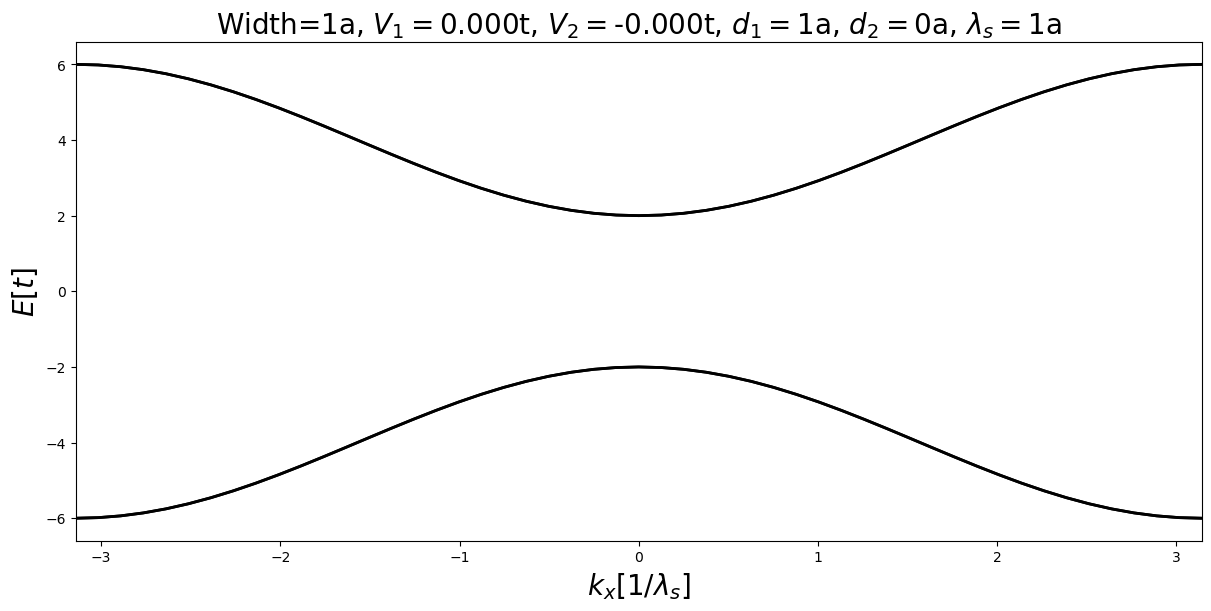

In [19]:
#plot band structure
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(12,6), constrained_layout=True)
ax.set_title('Width={0}a, $V_1=${1:.3f}t, $V_2=${2:.3f}t, $d_1=${3}a, $d_2=${4}a, $\lambda_s=${5}a'
             .format(Ly, V1, -V1, d1, d2, d1+d2),fontsize=20)

#ax.plot(momenta,np.ones(len(momenta)),'--r',lw=3,alpha=0.25)
#ax.plot(momenta,-np.ones(len(momenta)),'--r',lw=3,alpha=0.25)
ax.plot(momenta, np.array(energies),'-k',lw=2)
ax.set_ylabel('$E [t]$', fontsize=20)
ax.set_xlabel('$k_x [1/\\lambda_s]$', fontsize=20)
#ax.set_ylim(-1, 1)
ax.set_xlim(-np.pi, np.pi)
plt.savefig('SL={0}a_V1={1:.3f}t.png'.format(xperiod,V1))
#plt.clf()

# Krönig-Penney Model

The potential of the Kronig-Penney model has the form

\begin{equation}
V(0<x<a)=\left\{\begin{array}{ll}{0} & {0<x<\frac{a-b}{2}} \\ {V_{0}} & {\frac{a-b}{2} \leq x \leq \frac{a+b}{2}} \\ {0} & {\frac{a+b}{2}<x<a}\end{array}\right.
\end{equation}

<img src="KP_model.png" width="720" align="center">

\begin{equation}
\begin{aligned} \cos (K a) &=-\frac{\alpha^{2}+\beta^{2}}{2 \alpha \beta} \sin (\alpha(a-b)) \sin (\beta b) +\cos (\alpha(a-b)) \cos (\beta b) \end{aligned}
\end{equation}

where $\alpha=\sqrt{2mE}/\hbar$ and $\beta=\sqrt{2m(E-V_0)}/\hbar$